In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [12]:
#%% load the data
data_dir = os.getcwd() + '\\Data\\'
image_dir = data_dir + 'images\\' 
image_rev_dir = image_dir + 'rev\\'

# total count of samples
sample_count = 1584

# load images
images = []
for image_label in range(1, sample_count + 1):
    image = mpimg.imread(image_dir + str(image_label) + '.jpg')
    images.append(image)

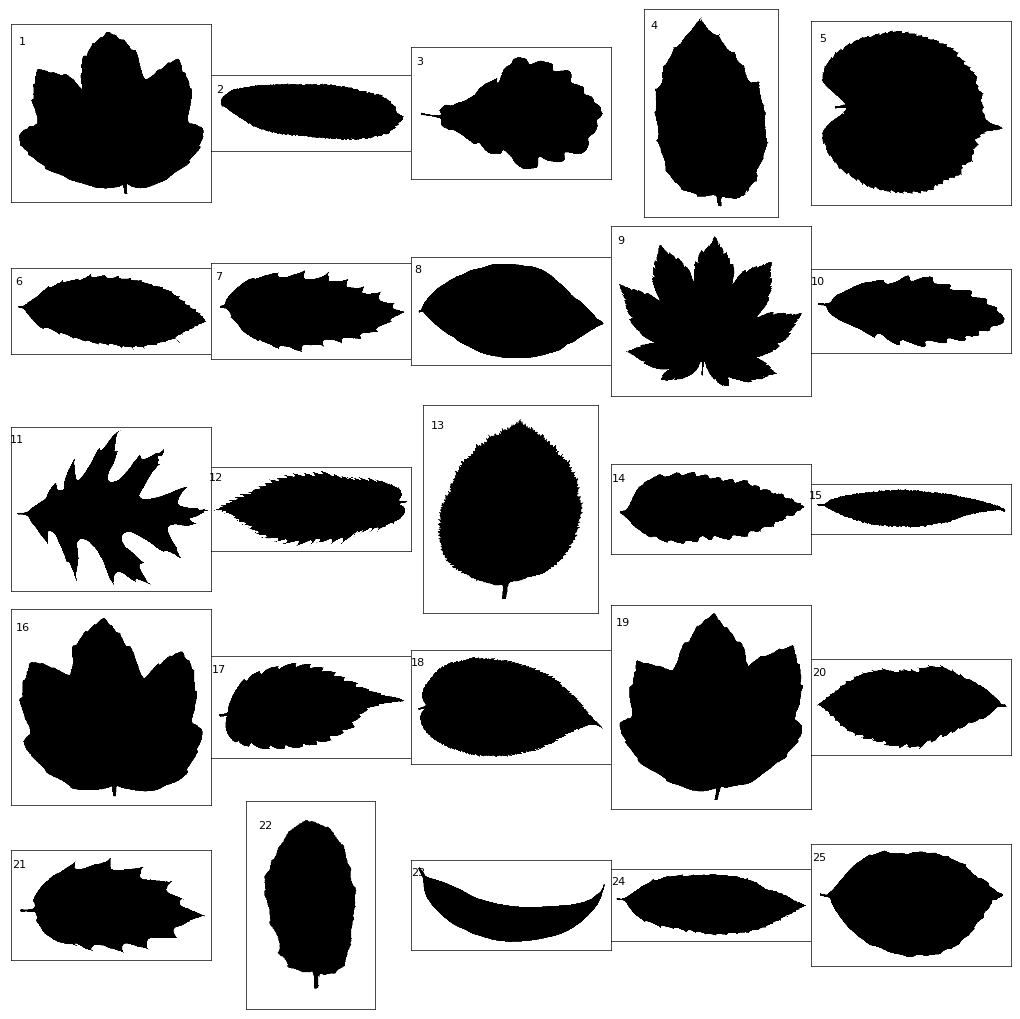

In [15]:
plt.rcParams['axes.linewidth'] = 0.5
fig = plt.figure(figsize=(10, 10))
for i in range(25):
    sub = plt.subplot(5, 5, i + 1)
    sub.set_xticks(())
    sub.set_yticks(())
    sub.text(30, 30, i + 1, ha='center', va='top', size=8, color="k")
    sub.imshow(images[i], cmap=plt.get_cmap('gray_r'))
    
fig.tight_layout(pad = 0)
plt.show()

In [4]:
widths = [img.shape[0] for img in images]
heights = [img.shape[1] for img in images]
max_width = max(widths)
max_height = max(heights)
print(max_width)
print(max_height)

1089
1706


In [5]:
from PIL import Image, ImageChops, ImageOps

def resize_image(f_in, f_out, size=(128, 128)):

    image = Image.open(f_in)
    
    w_ratio = size[0] / image.size[0]
    h_ratio = size[1] / image.size[1]
    
    if w_ratio <= h_ratio:
        ratio = w_ratio
    else:
        ratio = h_ratio
    
    new_size = int(ratio * image.size[0]), int(ratio * image.size[1])
    resized_image = image.resize(new_size, Image.ANTIALIAS)
    
    offset_x = int(max((size[0] - new_size[0]) / 2, 0 ))
    offset_y = int(max((size[1] - new_size[1]) / 2, 0 ))
    
    out_image = Image.new('L', size)
    out_image.paste(resized_image, (offset_x, offset_y))
    out_image.save(f_out)

In [6]:
images_rev = []
for image_label in range(1, sample_count + 1):
    f_in = image_dir + str(image_label) + '.jpg'
    f_out = image_rev_dir + str(image_label) + '.jpg'
    resize_image(f_in, f_out, (1089,1706))
    image = mpimg.imread(f_out)
    images_rev.append(image)

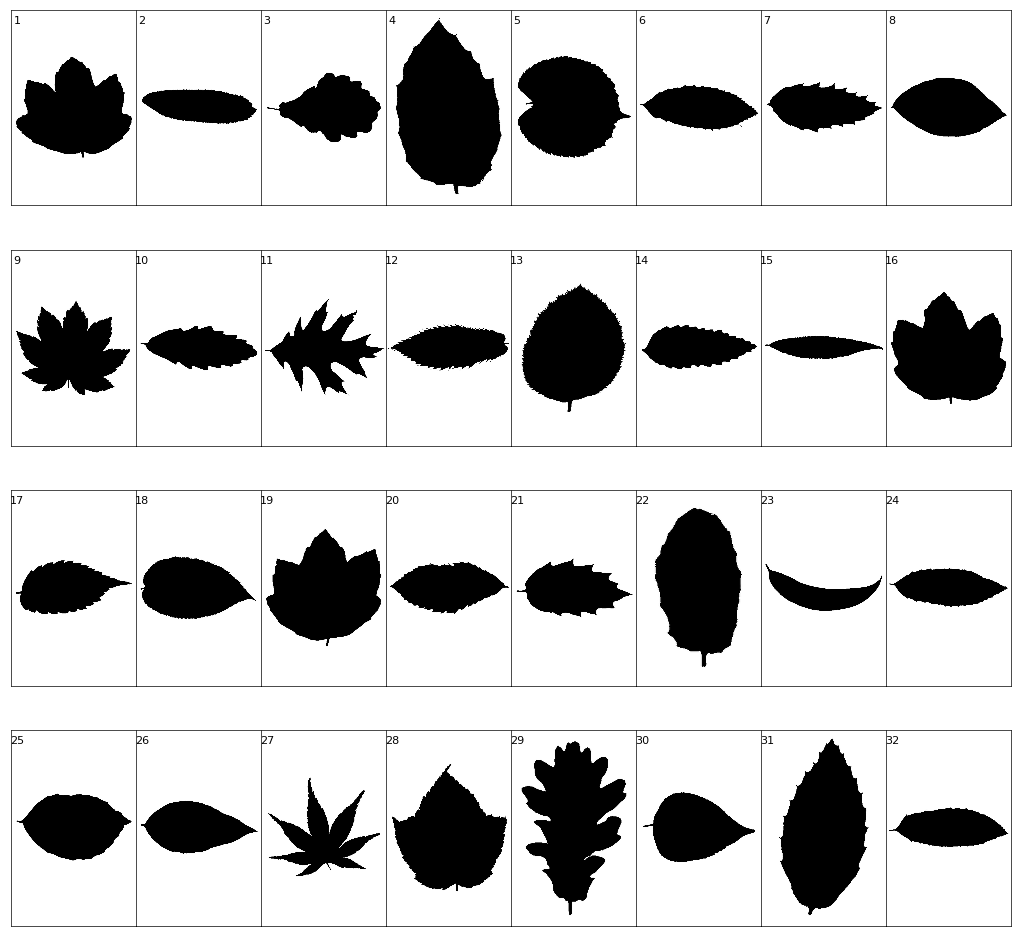

In [8]:
plt.rcParams['axes.linewidth'] = 0.5
fig = plt.figure(figsize=(10, 10))
for i in range(32):
    sub = plt.subplot(4, 8, i + 1)
    sub.set_xticks(())
    sub.set_yticks(())
    sub.text(50, 50, i + 1, ha='center', va='top', size=8, color="k")
    sub.imshow(images_rev[i], cmap=plt.get_cmap('gray_r'))
    
fig.tight_layout(pad = 0)
plt.show()